![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Handwritten Digit Classification using Artificial Neural Networks (ANN)

Handwritten digit classification is a popular task in the field of machine learning, where the goal is to classify images of handwritten digits into their corresponding numeric labels (0-9). This project focuses on building a neural network model using Artificial Neural Networks (ANNs) to recognize and classify digits from the well-known [MNIST](https://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset contains 70,000 images of handwritten digits, which are grayscale and of 28x28 pixel size. By training a neural network on this dataset, we aim to build a robust model that can accurately predict unseen handwritten digits, which has potential applications in digit recognition systems, automated form processing, and more.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. MNIST Dataset Description

The [MNIST](https://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) dataset is one of the most widely used datasets in machine learning for training image classification models. It consists of 70,000 grayscale images of handwritten digits, with each image having a resolution of 28x28 pixels. The dataset is divided into two sets: a training set of 60,000 images and a test set of 10,000 images. Each image is labeled with a corresponding digit from 0 to 9. The MNIST dataset is considered a benchmark for evaluating machine learning algorithms in image classification tasks due to its simplicity, yet it poses a challenge for creating high-accuracy models.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Load, Explore & Preprocess MNIST Dataset

## Import Libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import matplotlib.pyplot as plt

## Load MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


## Explore MNIST Dataset

In [6]:
# One sample
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

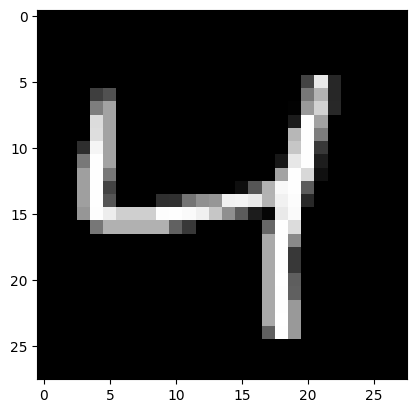

In [7]:
# Convert pixel values to image
plt.imshow(X_train[2], cmap="gray")

## Scaling

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Model Building

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))  # Converts dimensions from 28x28 to 1x784
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Model Training

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8660 - loss: 0.4715 - val_accuracy: 0.9545 - val_loss: 0.1529
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9606 - loss: 0.1364 - val_accuracy: 0.9638 - val_loss: 0.1191
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9730 - loss: 0.0888 - val_accuracy: 0.9710 - val_loss: 0.0969
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9815 - loss: 0.0616 - val_accuracy: 0.9725 - val_loss: 0.0894
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9857 - loss: 0.0470 - val_accuracy: 0.9738 - val_loss: 0.0859
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0345 - val_accuracy: 0.9735 - val_loss: 0.0915
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9921 - loss: 0.0268 - val_accuracy: 0.9757 - val_loss: 0.0866
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9940 - loss: 0.0207 -

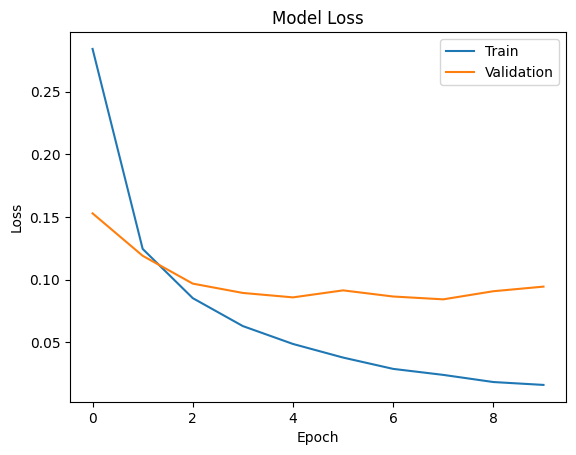

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

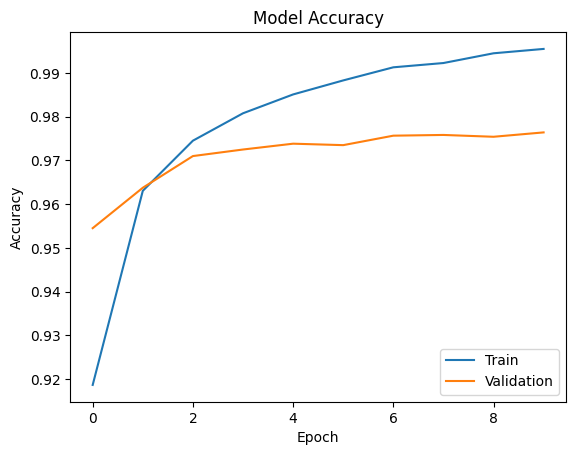

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")

In [16]:
# Get weights of 2nd layer (i.e. first hidden layer after Flatten layer)
model.layers[1].get_weights()

[array([[ 0.00328086,  0.07413187,  0.04309894, ...,  0.01674736,
          0.02472202, -0.00180573],
        [ 0.07047234, -0.05144003, -0.01029646, ...,  0.04379286,
         -0.08067796, -0.06952606],
        [ 0.03237937, -0.01044947, -0.00170815, ...,  0.00948315,
         -0.03013723, -0.04489839],
        ...,
        [ 0.02509297, -0.00724865,  0.06482246, ..., -0.06983563,
         -0.02188952, -0.06336506],
        [ 0.06958394,  0.05943649, -0.07391914, ..., -0.0686599 ,
         -0.06968351, -0.06803032],
        [ 0.01877664,  0.06101728,  0.07133556, ...,  0.03503009,
          0.02789929,  0.06251711]], dtype=float32),
 array([ 2.01607853e-01,  3.74976769e-02, -2.43029464e-02, -2.22285032e-01,
         7.20997676e-02,  4.03507054e-02, -3.29147205e-02,  2.11161864e-03,
        -9.11152959e-02,  3.90721411e-02,  1.00738844e-02, -1.23006120e-01,
        -6.76405104e-03, -6.54136688e-02,  3.79682668e-02, -2.68771723e-02,
         1.04800276e-01, -7.65732154e-02, -3.75261307e

In [17]:
# Get weights of 3rd layer (i.e. output layer)
model.layers[2].get_weights()

[array([[-0.36793923,  0.20360723,  0.40628442, ..., -0.37838724,
         -0.3639054 ,  0.05325854],
        [ 0.12082348, -0.42327443,  0.29391435, ..., -0.2908771 ,
         -0.40232226,  0.04046506],
        [ 0.2648445 , -0.4554192 ,  0.11905419, ..., -0.37156174,
         -0.2692523 , -0.18798925],
        ...,
        [ 0.01911811, -0.25354788, -0.07467554, ..., -0.1488175 ,
          0.16638497, -0.04782178],
        [-0.12451427,  0.05707598,  0.1411178 , ..., -0.3321623 ,
         -0.19022122,  0.09036224],
        [ 0.31112674, -0.22770235, -0.11008355, ..., -0.0148942 ,
         -0.01690664,  0.19431874]], dtype=float32),
 array([-0.10563793, -0.10254209, -0.05951811, -0.02235304,  0.05007927,
         0.04662417, -0.01517509, -0.08182571,  0.20566642, -0.00568676],
       dtype=float32)]

**Note**

The key difference between `sparse_categorical_crossentropy` and `categorical_crossentropy` lies in the way the labels are formatted:

- Use `sparse_categorical_crossentropy` if your labels are integer-encoded (e.g., `[0, 1, 2, 3, ...]`).

- Use `categorical_crossentropy` if your labels are one-hot encoded (e.g., `[[1, 0, 0], [0, 1, 0], [0, 0, 1]]`).

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Model Prediction

In [20]:
# Model Prediction
y_prob = model.predict(X_test)
print(f"Shape of y_prob: {y_prob.shape} ")
print(f"y_prob: \n{y_prob}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of y_prob: (10000, 10) 
y_prob: 
[[1.0242589e-10 1.6958361e-12 9.1538840e-07 ... 9.9999708e-01
  1.4240145e-08 1.5103318e-08]
 [8.9322381e-13 7.6417308e-07 9.9999923e-01 ... 8.2012238e-19
  6.6130668e-10 1.0683118e-18]
 [5.0598157e-09 9.9986887e-01 7.8155581e-06 ... 6.3941756e-05
  5.6595098e-05 1.6051869e-08]
 ...
 [2.4050125e-14 3.9014340e-11 1.4721013e-11 ... 3.6452782e-06
  3.0948968e-06 2.9012904e-04]
 [3.6660396e-14 1.3981494e-14 2.5469210e-13 ... 1.1560640e-14
  3.6937883e-05 1.9631454e-12]
 [2.4371765e-08 1.2656415e-10 1.1058172e-10 ... 2.4928169e-16
  4.0740068e-11 2.1739942e-10]]


In [21]:
y_pred = y_prob.argmax(axis=1)
print(f"Shape of y_pred: {y_pred.shape}")
print(f"y_pred: \n{y_pred}")

Shape of y_pred: (10000,)
y_pred: 
[7 2 1 ... 4 5 6]


In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9773


## Prediction on a single image

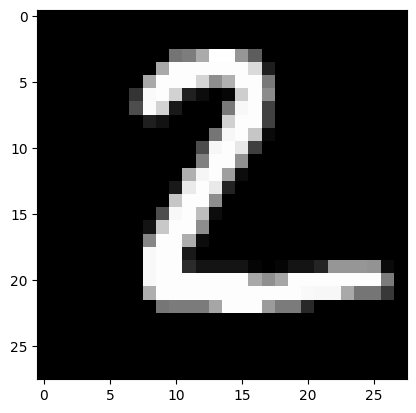

In [23]:
plt.imshow(X_test[1], cmap="gray")

In [25]:
y_prob = model.predict(X_test[1].reshape(1,28,28))
print(f"Shape of y_prob: {y_prob.shape} ")
print(f"y_prob: \n{y_prob}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Shape of y_prob: (1, 10) 
y_prob: 
[[8.9322386e-13 7.6417308e-07 9.9999928e-01 3.5308054e-10 1.6869314e-21
  2.3156965e-13 5.7936240e-13 8.2012244e-19 6.6130917e-10 1.0683161e-18]]


In [26]:
y_pred = y_prob.argmax(axis=1)
print(f"Shape of y_pred: {y_pred.shape}")
print(f"y_pred: \n{y_pred}")

Shape of y_pred: (1,)
y_pred: 
[2]


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Experiment: Use Updated Model

Here, we update the model by adding a hidden layer with 32 nodes after 1st hidden layer.

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))  # Converts dimensions from 28x28 to 1x784
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8558 - loss: 0.4918 - val_accuracy: 0.9548 - val_loss: 0.1556
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9615 - loss: 0.1237 - val_accuracy: 0.9671 - val_loss: 0.1147
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9760 - loss: 0.0802 - val_accuracy: 0.9688 - val_loss: 0.1074
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9834 - loss: 0.0546 - val_accuracy: 0.9722 - val_loss: 0.1029
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9851 - loss: 0.0464 - val_accuracy: 0.9726 - val_loss: 0.1073
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9756 - val_loss: 0.0940
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9911 - loss: 0.0285 - val_accuracy: 0.9737 - val_loss: 0.1000
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9924 - loss: 0.0231 

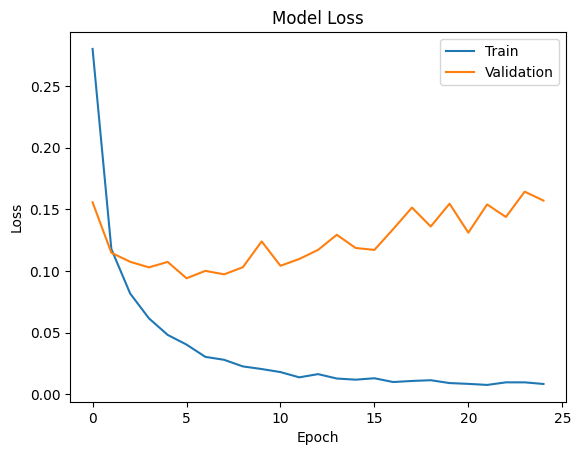

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

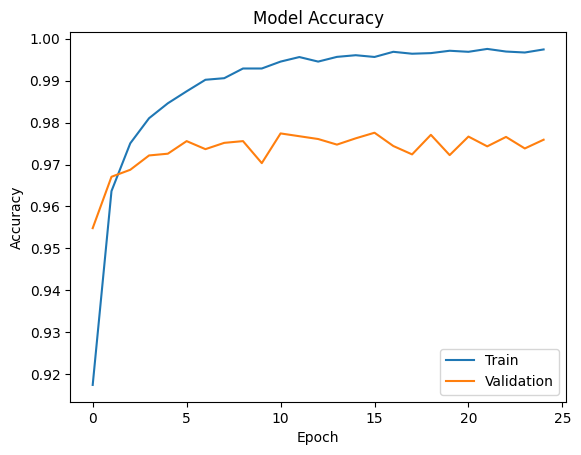

In [33]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")

In [35]:
# Get weights of 2nd layer (i.e. first hidden layer after Flatten layer)
model.layers[1].get_weights()

[array([[-0.01419079, -0.02996444, -0.07561958, ...,  0.0234836 ,
          0.02121323, -0.02893886],
        [ 0.00538465, -0.06804869,  0.05923862, ..., -0.0196978 ,
          0.05152384,  0.00626857],
        [-0.07794087, -0.0786427 , -0.0613934 , ...,  0.00214632,
         -0.04817588, -0.06719296],
        ...,
        [-0.06729158, -0.06999306,  0.05782475, ..., -0.07114267,
          0.0503974 ,  0.03907918],
        [-0.05084451, -0.06239998, -0.04368845, ..., -0.06118168,
          0.04253676, -0.03399493],
        [ 0.01292601, -0.02650778,  0.03981166, ...,  0.01595168,
          0.06277608,  0.03535269]], dtype=float32),
 array([ 0.0608966 , -0.00799181, -0.09408717,  0.01793515,  0.27454078,
         0.03269128, -0.06125837, -0.04368133, -0.04127343, -0.01878063,
        -0.083779  , -0.03394272,  0.03217252,  0.15013376, -0.00535316,
         0.07552736,  0.048583  , -0.02898902,  0.18070213, -0.00277964,
        -0.04751366,  0.07629348,  0.0105711 , -0.07809536, -0.014

In [36]:
# Get weights of 3rd layer (i.e. second hidden layer)
model.layers[2].get_weights()

[array([[-0.11321935,  0.20672798, -0.293195  , ...,  0.22992986,
         -0.06691982, -0.28293154],
        [-0.04646463,  0.0302583 , -0.44462326, ..., -0.07790194,
          0.19919157, -0.14616653],
        [ 0.37929943, -0.03992836, -0.25357878, ...,  0.00683854,
          0.32249293, -0.30644327],
        ...,
        [-0.20652017,  0.13577577,  0.20045713, ..., -0.13702294,
          0.11284722,  0.3696307 ],
        [ 0.16441879, -0.08211625,  0.08284535, ...,  0.23097405,
         -0.012755  ,  0.3338819 ],
        [ 0.60088044,  0.20619044,  0.40114734, ...,  0.5483266 ,
         -0.5289592 ,  0.6558682 ]], dtype=float32),
 array([-0.0384725 , -0.05847269,  0.00917473, -0.20979933, -0.09384216,
         0.3790049 , -0.09450878,  0.09984307, -0.21874584,  0.12628835,
        -0.00245894,  0.02642309,  0.2149976 ,  0.00849763, -0.11658178,
         0.4697177 , -0.14582421,  0.21758187, -0.01195916,  0.4031772 ,
         0.25377524, -0.03613201,  0.06671685,  0.13317834,  0.270

In [37]:
# Get weights of 4th layer (i.e. output layer)
model.layers[3].get_weights()

[array([[ 6.07630253e-01,  3.42546999e-01, -1.72140321e-03,
         -3.89926016e-01, -2.53751904e-01, -5.39694786e-01,
          7.72722289e-02, -2.53923625e-01, -5.06677143e-02,
          2.21447721e-01],
        [ 7.31715709e-02,  3.94657850e-01, -9.90094170e-02,
         -6.49314880e-01,  3.78843069e-01, -1.54808924e-01,
         -3.32229048e-01, -6.13391757e-01, -1.32308289e-01,
         -2.10617170e-01],
        [-3.77755225e-01, -1.91178154e-02,  5.19396245e-01,
         -4.01131213e-01,  1.20598182e-01, -2.28244260e-01,
          3.70596111e-01, -4.19990152e-01, -3.39300990e-01,
         -4.74782914e-01],
        [-1.16743473e-02,  2.04818249e-01,  4.41142887e-01,
          2.17573300e-01, -6.44773901e-01, -2.69701984e-02,
         -5.99604011e-01,  1.54241189e-01, -5.03498018e-01,
         -9.48312432e-02],
        [-1.43235549e-01,  4.80214596e-01, -3.66109237e-02,
         -2.41988748e-01, -1.29018962e-01, -7.28436410e-02,
          1.25765935e-01,  1.45705685e-01, -4.696291

In [38]:
# Model Prediction
y_prob = model.predict(X_test)
print(f"Shape of y_prob: {y_prob.shape} ")
print(f"y_prob: \n{y_prob}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of y_prob: (10000, 10) 
y_prob: 
[[2.7330659e-15 2.1869868e-13 8.1618617e-10 ... 9.9999958e-01
  1.1050673e-08 3.1046692e-08]
 [1.1924413e-22 1.2480292e-14 9.9999994e-01 ... 1.6427713e-28
  1.0926444e-21 5.5870746e-36]
 [1.5366364e-10 9.9997824e-01 8.3781933e-06 ... 8.3649716e-08
  1.2392386e-05 8.2764416e-13]
 ...
 [1.5586198e-32 5.1025573e-22 2.1808615e-38 ... 1.9566633e-17
  4.3037393e-22 1.1081307e-11]
 [8.8031262e-20 4.0538916e-14 6.3531620e-23 ... 4.0390549e-23
  3.6338810e-07 7.8801110e-15]
 [2.1264392e-28 2.0632202e-26 3.1428349e-32 ... 8.9078055e-37
  1.9419092e-26 8.2666143e-29]]


In [39]:
y_pred = y_prob.argmax(axis=1)
print(f"Shape of y_pred: {y_pred.shape}")
print(f"y_pred: \n{y_pred}")

Shape of y_pred: (10000,)
y_pred: 
[7 2 1 ... 4 5 6]


In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9753


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)